## Unsupervised Learning (Principal Component Analysis)

<h4>DAT-5303 | Machine Learning</h4>
Zeyad Elgendy - MSC in Business Analytics<br>
Hult International Business School<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

## Part I: Data Exploration and Manipulation

The Dataset in this script the yearly revenue from the spending of customers in the 
Apprentice dataset. By which checking the different customer behavior and their preferences of different food
and taste. By which using the different continous variables. to know the different factor loading and the 
factors that effect the meals which has an impact on the selling process and of course it impacts the revenue.

In [7]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca


########################################
# loading data and setting display options
########################################
# loading data

chef_df = pd.read_excel('Apprentice_Chef_Dataset.xlsx')
 
print(chef_df)


# outputting the first ten rows of the dataset
chef_df.head(n = 10)

      REVENUE  CROSS_SELL_SUCCESS               NAME  \
0       393.0                   1            Saathos   
1      1365.0                   1    Alysanne Osgrey   
2       800.0                   1     Edwyd Fossoway   
3       600.0                   1  Eleyna Westerling   
4      1490.0                   1      Elyn Norridge   
...       ...                 ...                ...   
1941   3450.0                   0         Obara Sand   
1942   5829.0                   0  Quentyn Blackwood   
1943   1900.0                   0       Rhonda Rowan   
1944   1600.0                   0             Turnip   
1945   2050.0                   1     Tommard Heddle   

                            EMAIL FIRST_NAME FAMILY_NAME  TOTAL_MEALS_ORDERED  \
0        saathos@unitedhealth.com    Saathos     Saathos                   14   
1          alysanne.osgrey@ge.org   Alysanne      Osgrey                   87   
2          edwyd.fossoway@jnj.com      Edwyd    Fossoway                   15   
3  

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,393.00,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,...,0,2,0,0,33.4,1,0,1,17,0
1,1365.00,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,...,0,2,0,0,84.8,1,0,3,13,170
2,800.00,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,...,0,1,0,0,63.0,1,0,2,16,0
3,600.00,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,...,0,3,0,0,43.8,1,0,2,14,0
4,1490.00,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,...,0,8,0,0,84.8,1,1,3,12,205
5,1550.00,1,Genna Lannister,genna.lannister@protonmail.com,Genna,Lannister,36,2,9,1,...,0,3,1,0,78.8,1,1,3,12,0
6,1430.00,1,Olene Tyrell,olene.tyrell@mcdonalds.com,Olene,Tyrell,61,7,6,2,...,1,2,1,1,84.8,1,0,3,12,169
7,1321.25,1,Stevron Frey,stevron.frey@travelers.com,Stevron,Frey,13,1,12,3,...,0,0,0,0,63.0,1,0,1,15,0
8,1505.00,1,Praed,praed@nike.com,Praed,Praed,16,1,12,5,...,0,1,0,0,63.0,1,0,2,18,0
9,1493.00,0,Alysane Mormont,alysane.mormont@caterpillar.com,Alysane,Mormont,95,3,6,8,...,0,2,1,0,84.8,1,1,3,14,147


In [8]:
chef_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   CROSS_SELL_SUCCESS           1946 non-null   int64  
 2   NAME                         1946 non-null   object 
 3   EMAIL                        1946 non-null   object 
 4   FIRST_NAME                   1946 non-null   object 
 5   FAMILY_NAME                  1899 non-null   object 
 6   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 7   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 8   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 9   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 10  AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 11  MOBILE_NUMBER                1946 non-null   int64  
 12  CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 13  CANCELLATIONS_AFTE

In [9]:
# Dropping the missing values.
chef_df = chef_df.drop(["NAME","EMAIL","FIRST_NAME","FAMILY_NAME","REVENUE"],axis=1)

In [10]:
chef_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROSS_SELL_SUCCESS           1946 non-null   int64  
 1   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 2   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 3   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 4   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 5   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 6   MOBILE_NUMBER                1946 non-null   int64  
 7   CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 8   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 9   TASTES_AND_PREFERENCES       1946 non-null   int64  
 10  PC_LOGINS                    1946 non-null   int64  
 11  MOBILE_LOGINS                1946 non-null   int64  
 12  WEEKLY_PLAN                  1946 non-null   int64  
 13  EARLY_DELIVERIES  

In [11]:
chef_df.head(n=20)

,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1,14,6,12,10,48.00,1,3,1,1,...,0,2,0,0,33.4,1,0,1,17,0
1,1,87,3,8,8,40.35,1,0,0,1,...,0,2,0,0,84.8,1,0,3,13,170
2,1,15,7,11,5,19.77,1,3,0,1,...,0,1,0,0,63.0,1,0,2,16,0
3,1,13,6,11,5,90.00,1,2,0,1,...,0,3,0,0,43.8,1,0,2,14,0
4,1,47,8,6,10,40.38,1,0,0,0,...,0,8,0,0,84.8,1,1,3,12,205
5,1,36,2,9,1,190.18,1,4,0,1,...,0,3,1,0,78.8,1,1,3,12,0
6,1,61,7,6,2,154.20,1,1,0,1,...,1,2,1,1,84.8,1,0,3,12,169
7,1,13,1,12,3,228.73,1,0,0,1,...,0,0,0,0,63.0,1,0,1,15,0
8,1,16,1,12,5,14.26,1,0,0,1,...,0,1,0,0,63.0,1,0,2,18,0
9,0,95,3,6,8,49.26,1,0,0,0,...,0,2,1,0,84.8,1,1,3,14,147


## Part II: Introduction and Prepartion

<b> A note on the Dataset:

Indeed the study in this script will be compensated on the factors that 
affected the customer to cancel his order by which viewing whether they were using pclogins
or mobile logins for their delivries and what caused mostly the deliveries of the meals to be late or early according to the correltions and its factor loadings between each variables by which this study is conducted on the consumer behavior.


#### User-Defined Functions
Run the following code to load the user-defined functions used throughout this Notebook.

In [12]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [13]:
# checking information about each column
chef_df

,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,...,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1,14,6,12,10,48.00,1,3,1,1,...,0,2,0,0,33.4,1,0,1,17,0
1,1,87,3,8,8,40.35,1,0,0,1,...,0,2,0,0,84.8,1,0,3,13,170
2,1,15,7,11,5,19.77,1,3,0,1,...,0,1,0,0,63.0,1,0,2,16,0
3,1,13,6,11,5,90.00,1,2,0,1,...,0,3,0,0,43.8,1,0,2,14,0
4,1,47,8,6,10,40.38,1,0,0,0,...,0,8,0,0,84.8,1,1,3,12,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,0,87,8,8,7,108.90,1,0,0,1,...,0,3,0,0,212.5,10,2,3,11,0
1942,0,244,4,7,2,133.91,1,1,2,1,...,0,3,0,0,282.2,10,1,4,10,424
1943,0,57,2,8,4,102.71,1,2,0,1,...,3,7,0,0,254.4,10,0,4,12,480
1944,0,74,3,10,10,638.87,0,0,0,1,...,0,3,0,0,564.2,10,3,3,11,796


#### a) Write code to check information about non-missing values and data types for each column.

In [14]:
# checking information about each column
chef_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CROSS_SELL_SUCCESS           1946 non-null   int64  
 1   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 2   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 3   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 4   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 5   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 6   MOBILE_NUMBER                1946 non-null   int64  
 7   CANCELLATIONS_BEFORE_NOON    1946 non-null   int64  
 8   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 9   TASTES_AND_PREFERENCES       1946 non-null   int64  
 10  PC_LOGINS                    1946 non-null   int64  
 11  MOBILE_LOGINS                1946 non-null   int64  
 12  WEEKLY_PLAN                  1946 non-null   int64  
 13  EARLY_DELIVERIES  

In [15]:
# value counts for channel and region
print(f"""\
CONTACTS_W_CUSTOMER_SERVICE
-------
{chef_df['CONTACTS_W_CUSTOMER_SERVICE'].value_counts(normalize=False).to_string(buf=None)}


PRODUCT_CATEGORIES_VIEWED
------
{chef_df['PRODUCT_CATEGORIES_VIEWED'].value_counts(normalize=False).to_string(buf=None)}""")

CONTACTS_W_CUSTOMER_SERVICE
-------
7     378
6     356
5     292
8     256
4     180
9     138
11    121
12     92
10     68
3      53
2       8
16      1
13      1
18      1
1       1


PRODUCT_CATEGORIES_VIEWED
------
2     313
10    287
3     253
7     170
8     166
1     162
5     156
6     153
4     146
9     140


#### Generating histograms for each features in the dataset

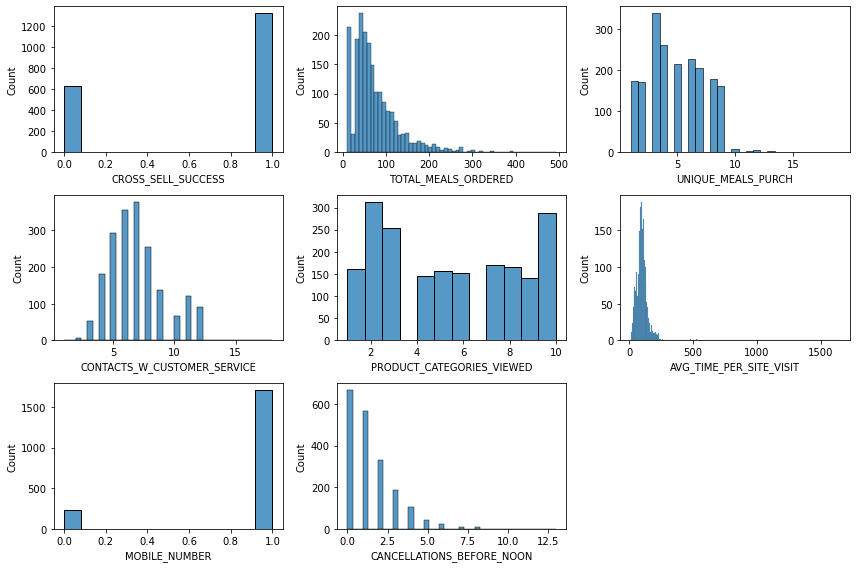

In [16]:
# setting figure size
fig, ax = plt.subplots(figsize = (12, 8))


# initializing a counter
count = 0


# looping to create visualizations
for col in chef_df:

    # condition to break
    if count == 8:
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(3, 3, count)
    sns.histplot(x = chef_df[col],)


# formatting, saving, and displaying the plot
plt.tight_layout()
plt.show()

### Step 2:
Creating a Subset of the Continuous X-variables by which starting my correlations to understanding understanding which consumers like what and what consumers don't like and how it impacts most of the the company in the product life cycle and their preferable taste. how the company can manage better the product line by knowing the which amount of the meals are ordered according to the consumers tastes and preferences.

In [29]:
# don't forget about comments in your code

x_variables = [
 
'TOTAL_MEALS_ORDERED',
'CONTACTS_W_CUSTOMER_SERVICE',
'PRODUCT_CATEGORIES_VIEWED',
'MEDIAN_MEAL_RATING',
'LARGEST_ORDER_SIZE',
'MASTER_CLASSES_ATTENDED',
'WEEKLY_PLAN',
'TOTAL_PHOTOS_VIEWED']
 


### Step 3:

#### Setting standard Scalar

Standardize the data using standard scalar by which understanding how the the products are sold according to different technologies

In [30]:
# code here
# scaling (normalizing) variables before correlation analysis
chef_scaled = scaler(df = chef_df[x_variables])


# checking pre- and post-scaling variance
print(np.var(chef_df), '\n\n')
print(np.var(chef_scaled))

CROSS_SELL_SUCCESS                 0.218020
TOTAL_MEALS_ORDERED             3057.599946
UNIQUE_MEALS_PURCH                 6.257663
CONTACTS_W_CUSTOMER_SERVICE        5.201168
PRODUCT_CATEGORIES_VIEWED          9.261178
AVG_TIME_PER_SITE_VISIT         3884.497383
MOBILE_NUMBER                      0.107344
CANCELLATIONS_BEFORE_NOON          2.400263
CANCELLATIONS_AFTER_NOON           0.186736
TASTES_AND_PREFERENCES             0.204082
PC_LOGINS                          0.337105
MOBILE_LOGINS                      0.278218
WEEKLY_PLAN                      184.139876
EARLY_DELIVERIES                   5.373137
LATE_DELIVERIES                    7.528947
PACKAGE_LOCKER                     0.229000
REFRIGERATED_LOCKER                0.100272
AVG_PREP_VID_TIME               2443.767133
LARGEST_ORDER_SIZE                 2.400232
MASTER_CLASSES_ATTENDED            0.411780
MEDIAN_MEAL_RATING                 0.572040
AVG_CLICKS_PER_VISIT               5.444177
TOTAL_PHOTOS_VIEWED            3

## Part II: Exploratory Data Analysis

Developing a correlation heatmap of the scaled purchasing features. To study more about the different variables which is available in the data set.

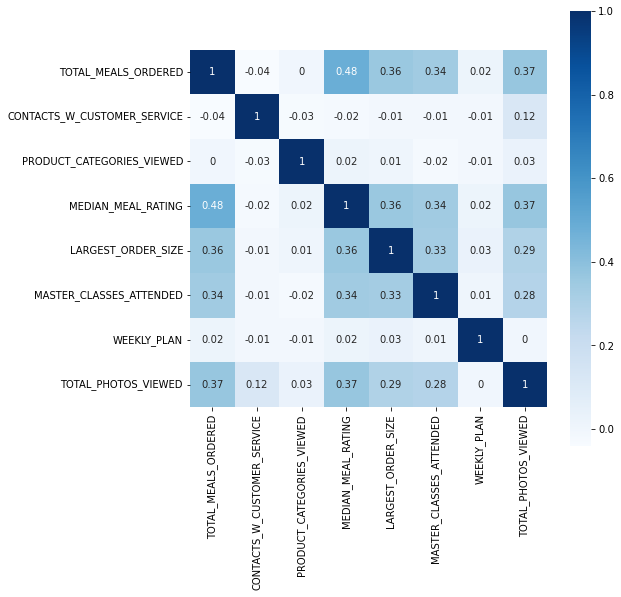

In [31]:
# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = chef_scaled.corr(method = "pearson").round(decimals = 2)


# creating a correlation heatmap
sns.heatmap(data   = df_corr,
            cmap   = 'Blues',
            square = True,
            annot  = True)


# rendering the heatmap
plt.show()

As a result of the heatmap the values in the each square showing the correlation between the variables on each axis. when the Values are closer to zero this shows there is no linear trend between the two variables. The close to 1 the correlation is that the variables are more positively correlated. To,conclude, that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.

## Part III: Principal Component Analysis

Run principal component analysis (PCA) and present its resulting factor loadings, rounded to two decimal places.

<u>Correlated Explanatory Variables</u><br>
Building a Model with correlated Explonatory variables is a violation of one of the key assumptions of generalized key models

<u>Dimensionality Reduction</u><br>
Commonly used large amount of explanatory of variables in a specific dataset which is used by a certain cosumer for example in our case PRODUCTSPRODUCT_CATEGORIES_VIEWED inorder to know which better fits what we use factors loading by PCA by which allowing the features to transform into principal components

<u>Latent Trait Exploration</u><br>
Understanding factors that cannot be measured directly through measurable constructs.<br><br><br>
<strong>Diminishing the number of Principal component</strong><br>A common heuristic is to include enough principal components to explain at least 80% of the variance in a dataset.
<br><br>




Initiating, fitting, and transforming a PCA model with no limits to its number of principal components. Make sure to use the scaled dataset for this task.


In [32]:
help(PCA)

Help on class PCA in module sklearn.decomposition._pca:

class PCA(sklearn.decomposition._base._BasePCA)
 |  PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA).
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space. The input data is centered
 |  but not scaled for each feature before applying the SVD.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 | 

In [33]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
    random_state = 219)


# FITTING and TRANSFORMING the scaled data
chef_pca = pca.fit_transform(chef_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", chef_scaled.shape)
print("PCA shape     :", chef_pca.shape)

Original shape: (1946, 8)
PCA shape     : (1946, 8)


In [34]:
chef_pca.round(2)

array([[-3.24,  1.87, -1.89, ..., -0.92, -0.08,  1.01],
       [-0.93,  0.36, -0.79, ..., -1.17, -0.59,  0.  ],
       [-2.62,  1.91, -0.66, ..., -0.88, -0.51,  0.06],
       ...,
       [ 2.63,  0.81,  0.03, ...,  3.06,  1.4 , -1.48],
       [ 4.83,  1.39, -1.57, ..., -0.15,  3.07, -0.24],
       [ 3.57,  0.22, -0.17, ...,  2.02, -0.65,  1.35]])

## Part IV: Examining PCA Algorithms

As we can see the shape of the data did not change. However, the original dataframe contains features, by which
the new dataframe has the principal components. Before analyzing each factor loading of each principal component it is critical to review each components explained variance ratio in each variable. And of course, all of the sum variables is 1.0.

#### a) Making a loop inorder to get out the explained variance ratio.


Making a loop for each principal component, printing its component number as well as its explained variance ratio

In [35]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(2)}")

PC 1: 0.3
PC 2: 0.13
PC 3: 0.13
PC 4: 0.12
PC 5: 0.09
PC 6: 0.08
PC 7: 0.08
PC 8: 0.06


In [41]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum(axis = 0))

1.0


### Scree Plots

Plots used to visualize the variance for each principal component. The intention in analyzing this plot is to check for where there is a minor return of explained variance. From another point, I am looking for the elbow where the line which connecting each of the principal component is less sharp.

#### c) Call the scree_plot function on the PCA object.

In [42]:
# calling the scree_plot function
help(scree_plot)

Help on function scree_plot in module __main__:

scree_plot(pca_object, export=False)
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)



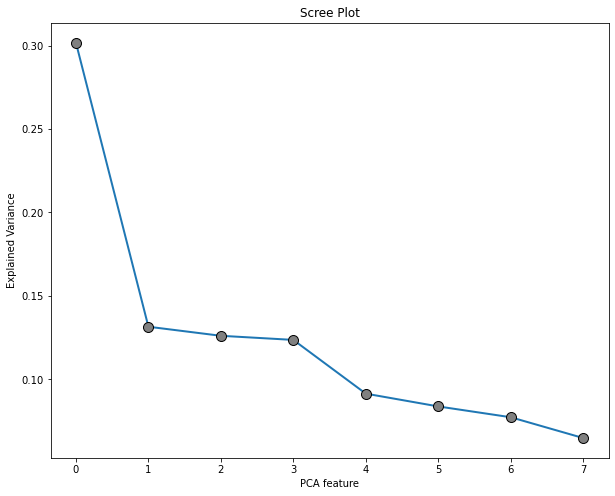

In [43]:
# calling the scree_plot function
scree_plot(pca_object=pca)

## Part V: Interpreting Principal Components and Persona Development

Principal components are important "bundles" of various parts of the explanatory variables that are used when constructing an algorithm. Each prinicipal component in the apprentice chef data is not directly measurable, but can be measured indirectly by analyzing its factor loadings. In other words, we can interpret the meaning of each principal component by checking into which features are strongly correlated with it.

After running the following code and analyzing the resulting correlation map between the original features and the principal components.


Each observation in the correlation heatmap are containing the different variables which are contained before
inorder to understand more the different consumer behavior and how the product line is different from each other of the food categorized

#### a) Analyzing the PC Factor Loadings

Analyzing the factor loadings and making a personna for each principal component

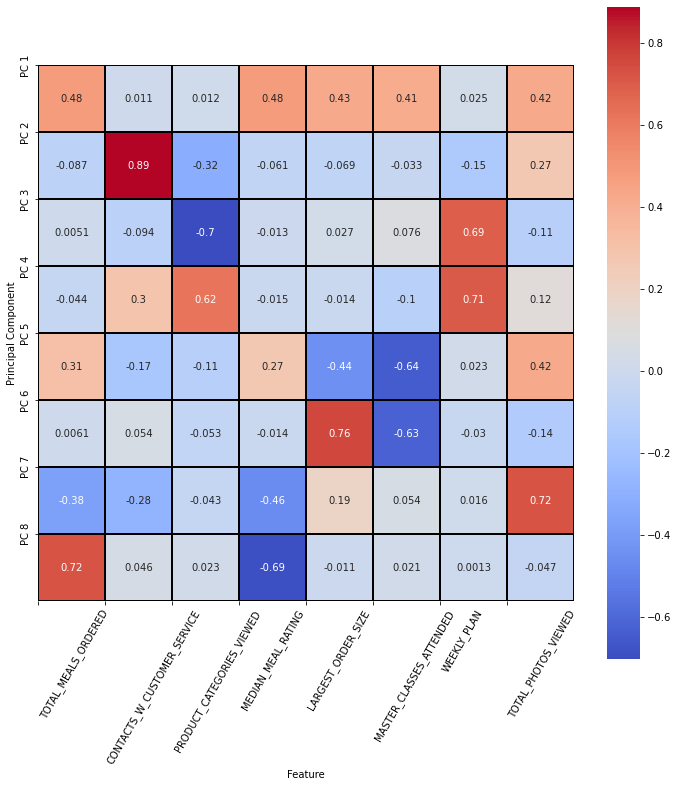

In [44]:
# setting plot size
fig, ax = plt.subplots(figsize = (12, 12))


# developing a PC to feature heatmap
sns.heatmap(pca.components_, 
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')


# setting more plot options
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7],
           ["PC 1", "PC 2", "PC 3", "PC 4", "PC 5", "PC 6","PC 7","PC 8"])

plt.xticks(range(0, 8),
           chef_scaled.columns,
           rotation=60,
           ha='left')

plt.xlabel(xlabel = "Feature")
plt.ylabel(ylabel = "Principal Component")


# displaying the plot
plt.show()

In [45]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(chef_scaled.columns)


# checking the result
print(factor_loadings_df)


# saving to Excel
factor_loadings_df.to_excel(excel_writer = 'customer_factor_loadings.xlsx',
                            index        = False)

                                0     1     2     3     4     5     6     7
TOTAL_MEALS_ORDERED          0.48 -0.09  0.01 -0.04  0.31  0.01 -0.38  0.72
CONTACTS_W_CUSTOMER_SERVICE  0.01  0.89 -0.09  0.30 -0.17  0.05 -0.28  0.05
PRODUCT_CATEGORIES_VIEWED    0.01 -0.32 -0.70  0.62 -0.11 -0.05 -0.04  0.02
MEDIAN_MEAL_RATING           0.48 -0.06 -0.01 -0.02  0.27 -0.01 -0.46 -0.69
LARGEST_ORDER_SIZE           0.43 -0.07  0.03 -0.01 -0.44  0.76  0.19 -0.01
MASTER_CLASSES_ATTENDED      0.41 -0.03  0.08 -0.10 -0.64 -0.63  0.05  0.02
WEEKLY_PLAN                  0.03 -0.15  0.69  0.71  0.02 -0.03  0.02  0.00
TOTAL_PHOTOS_VIEWED          0.42  0.27 -0.11  0.12  0.42 -0.14  0.72 -0.05


In [46]:
# naming each principal component
factor_loadings_df.columns = ["Speciality package",
                              "People mostly like veggies",
                              "Homefood lovers",
                              "People like healthy food ",
                              "Employees Meal Plan",
                              "Partial meal plan eaters",
                              "Preffering Homefood",
                              "Meal plan foodholic"]
                    


# checking the result
factor_loadings_df

,Speciality package,People mostly like veggies,Homefood lovers,People like healthy food,Employees Meal Plan,Partial meal plan eaters,Preffering Homefood,Meal plan foodholic
TOTAL_MEALS_ORDERED,0.48,-0.09,0.01,-0.04,0.31,0.01,-0.38,0.72
CONTACTS_W_CUSTOMER_SERVICE,0.01,0.89,-0.09,0.30,-0.17,0.05,-0.28,0.05
PRODUCT_CATEGORIES_VIEWED,0.01,-0.32,-0.70,0.62,-0.11,-0.05,-0.04,0.02
MEDIAN_MEAL_RATING,0.48,-0.06,-0.01,-0.02,0.27,-0.01,-0.46,-0.69
LARGEST_ORDER_SIZE,0.43,-0.07,0.03,-0.01,-0.44,0.76,0.19,-0.01
MASTER_CLASSES_ATTENDED,0.41,-0.03,0.08,-0.10,-0.64,-0.63,0.05,0.02
WEEKLY_PLAN,0.03,-0.15,0.69,0.71,0.02,-0.03,0.02,0.00
TOTAL_PHOTOS_VIEWED,0.42,0.27,-0.11,0.12,0.42,-0.14,0.72,-0.05


### Customer-Level Personas
Earlier in this script we instantiated, fit, and transformed the dataset's original features into principal components:

#### FITTING and TRANSFORMING the scaled data
chef_pca = pca.fit_transform(chef_scaled)


Now that we have developed personas, we can analyze how much each customer fits into each group. Run the following code to view the personas and factor loadings for each customer.

In [47]:
# converting into a DataFrame 
chef_pca = pd.DataFrame(chef_pca)


# renaming columns
chef_pca.columns = factor_loadings_df.columns


# checking results
chef_pca

,Speciality package,People mostly like veggies,Homefood lovers,People like healthy food,Employees Meal Plan,Partial meal plan eaters,Preffering Homefood,Meal plan foodholic
0,-3.242567,1.868628,-1.890864,1.150605,-0.202867,-0.921697,-0.083000,1.011618
1,-0.934098,0.359432,-0.786504,0.857635,1.709433,-1.169967,-0.591173,0.002120
2,-2.616591,1.905114,-0.659621,0.029793,0.417294,-0.879269,-0.507651,0.055844
3,-2.609761,1.763046,0.001310,0.707765,0.427845,-0.908254,-0.479133,0.030983
4,-0.571059,-0.486183,-1.429093,0.534722,0.632568,-2.247663,0.114375,-0.520682
...,...,...,...,...,...,...,...,...
1941,2.425710,-0.225662,-0.361074,-0.173109,-3.243743,1.451811,0.011622,0.040913
1942,4.769163,0.175083,0.807924,-0.670971,0.255603,2.146430,0.143982,0.975368
1943,2.629343,0.806878,0.031521,0.109203,0.185027,3.055109,1.401780,-1.475078
1944,4.833921,1.394527,-1.565098,1.008421,-2.717360,-0.152877,3.073727,-0.239713


Reviewing carefully the DataFrame above can unearth key findings and market opportunities.

In [48]:
# exploring customers in the Healthfood Heroes persona
chef_pca['Speciality package'][chef_pca['People mostly like veggies'] > 1.0]

0      -3.242567
2      -2.616591
3      -2.609761
5      -1.174917
7      -3.253598
          ...   
1926   -1.060493
1934   -0.800577
1935    0.466997
1939    4.059044
1944    4.833921
Name: Speciality package, Length: 333, dtype: float64

In [49]:
# exploring customers in the Healthfood Heroes persona
chef_pca['Speciality package'][chef_pca['Homefood lovers'] > 1.0]

6      -1.134027
8      -2.507839
11     -1.421957
16     -2.512774
21     -1.278001
          ...   
1921    2.117655
1922    5.729392
1925    2.077034
1929    0.331318
1930    0.633410
Name: Speciality package, Length: 274, dtype: float64

In [50]:
# exploring customers in the Healthfood Heroes persona
chef_pca['Employees Meal Plan'][chef_pca['People mostly like veggies'] > 1.0]

0      -0.202867
2       0.417294
3       0.427845
5       0.184822
7       0.069558
          ...   
1926   -2.158901
1934   -2.415205
1935   -1.754301
1939   -0.090622
1944   -2.717360
Name: Employees Meal Plan, Length: 333, dtype: float64

In [51]:
len(chef_pca['Employees Meal Plan'][chef_pca['People mostly like veggies'] > -1.0])/len(chef_pca)

0.8468653648509764

In [52]:
len(chef_pca['Homefood lovers'][chef_pca['Partial meal plan eaters'] > -1.0])/len(chef_pca)

0.8936279547790339

<AxesSubplot:xlabel='Meal plan foodholic', ylabel='Count'>

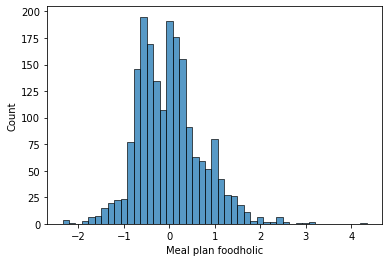

In [53]:
sns.histplot(chef_pca['Meal plan foodholic'])

## Part VI: Reducing to Relevant Principal Components

We will assume 3 PCs which is relevant number based on the elbow in the scree plot inorder to understand the correlation between the variables

#### a) Developing a new PCA model

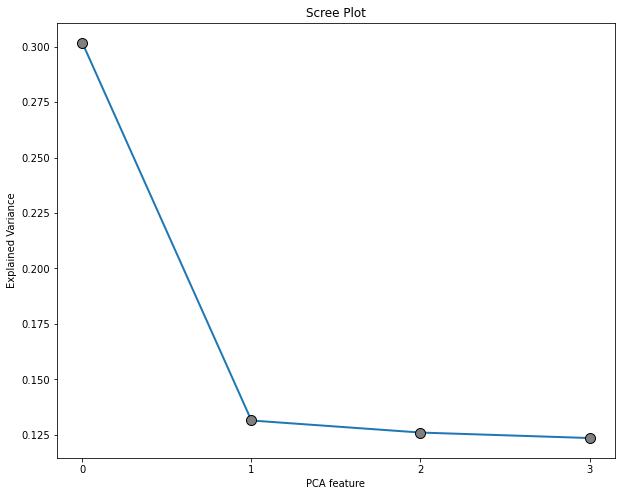

In [54]:
# INSTANTIATING a new model using the first three principal components
pca_4 = PCA(n_components = 4,
            random_state = 219)


# FITTING and TRANSFORMING the purchases_scaled
pca_4.fit_transform(chef_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca_4,
           export     = False)

Comparing the variance of the pca model with the variance of the reduced pca model.

In [56]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(chef_scaled.columns)


### 4 PC Model ###
# transposing pca components (pc = 4)
factor_loadings_4 = pd.DataFrame(np.transpose(pca_4.components_))


# naming rows as original features
factor_loadings_4 = factor_loadings_4.set_index(chef_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


4 Components Factor Loadings
------------------------------
{factor_loadings_4.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                                0     1     2     3     4     5     6     7
TOTAL_MEALS_ORDERED          0.48 -0.09  0.01 -0.04  0.31  0.01 -0.38  0.72
CONTACTS_W_CUSTOMER_SERVICE  0.01  0.89 -0.09  0.30 -0.17  0.05 -0.28  0.05
PRODUCT_CATEGORIES_VIEWED    0.01 -0.32 -0.70  0.62 -0.11 -0.05 -0.04  0.02
MEDIAN_MEAL_RATING           0.48 -0.06 -0.01 -0.02  0.27 -0.01 -0.46 -0.69
LARGEST_ORDER_SIZE           0.43 -0.07  0.03 -0.01 -0.44  0.76  0.19 -0.01
MASTER_CLASSES_ATTENDED      0.41 -0.03  0.08 -0.10 -0.64 -0.63  0.05  0.02
WEEKLY_PLAN                  0.03 -0.15  0.69  0.71  0.02 -0.03  0.02  0.00
TOTAL_PHOTOS_VIEWED          0.42  0.27 -0.11  0.12  0.42 -0.14  0.72 -0.05


4 Components Factor Loadings
------------------------------
                                0     1     2     3
TOTAL_MEALS_ORDERED          0.48 -0.09  0.01 -0.04
CONTACTS_W_CUSTOMER_SERVICE  0.01  0.89 -0.09  0.30
PRODUCT_CATEGORIES_VIEWED    0.01 -

Analyze and name each principal component based on its factor loading.

In this step after we made our analysis we will list our categorization of the factorleading of each customers
from which understanding how it may impact the dataset

In [58]:
# naming each principal component
factor_loadings_4.columns = ["Speciality package",
                              "People mostly like veggies",
                              "Homefood lovers",
                              "People like healthy food ",]

# checking the result
factor_loadings_4.round(decimals = 2)

,Speciality package,People mostly like veggies,Homefood lovers,People like healthy food
TOTAL_MEALS_ORDERED,0.48,-0.09,0.01,-0.04
CONTACTS_W_CUSTOMER_SERVICE,0.01,0.89,-0.09,0.30
PRODUCT_CATEGORIES_VIEWED,0.01,-0.32,-0.70,0.62
MEDIAN_MEAL_RATING,0.48,-0.06,-0.01,-0.02
LARGEST_ORDER_SIZE,0.43,-0.07,0.03,-0.01
MASTER_CLASSES_ATTENDED,0.41,-0.03,0.08,-0.10
WEEKLY_PLAN,0.03,-0.15,0.69,0.71
TOTAL_PHOTOS_VIEWED,0.42,0.27,-0.11,0.12


### Interpretation of the results:

- Speciality package people: Mostly they do not have free time and the want specific food with specific food taste and preference.By which having different tastes and qualities of food
- People mostly vegeterian: People who only eat veggies and has a small calorie defecit this is why it can be found and they always want to contact customer service. Only eat vegeterian food no any meat or chicken  this is why the don't attend classes or cook too much.
- People like healthy food: People who eat healthy meals with specific macros not any meal suits them it is according to their nutrition plan.
- Home food lovers: People who prefer more homefood and don't like eating too many meals from meal plan companies. By which they have low product categories viewed and low order size.
- How the Speciality package and homefood lovers depending on the inversely ratio of the amount of the product categories viewed and the total meals ordered.
- People who like healthy food differs from people which like veggies because thye need certain calorie defecit.
- Inorder, to get in more details I needed to discuss about the criteria that I used by which I categories different people to different categories. Inorder, to discriminate in the best way between each variable.
- By which changing the PCS into different variables inorder to discuss more about my set of data. I divided my data by the consumer eating habits which means their lifestyle and their way of living inorder to know what are the capabilities that I can give to the consumer to reach for a higher profit and get the highest meals rating and get also a higher repetition.
- To conclude, These are the variables in which I believe majorly affected the dataset and all of them are continuous variables they are all not discrete there is no 1 and 0 in all of them. By which in discriminating between the variable in the correlation heatmap and in the principal component analysis we can see that the apprentice chef company need to better study their consumers understand their lifestyle more to make profit and revenue through consumer ordering behavior.



In [ ]:
# checking factor loadings per customer
chef_pca.iloc[ :  ,  0:4 ]